In [8]:
import cv2 

In [9]:
image  = cv2.imread(r"C:\Users\chatt\Desktop\Computer Vision Tutorials\OpenCV Tutorials\Resources\Photos\cat.jpg")
B, G, R = cv2.split(image)

# Corresponding channels are separated

cv2.imshow("original", image)
cv2.waitKey(0)

cv2.imshow("Blue Channel", B)
cv2.waitKey(0)

cv2.imshow("Green Channel", G)
cv2.waitKey(0)

cv2.imshow("Red Channel", R)
cv2.waitKey(0)

cv2.destroyAllWindows()

Image Rotation 

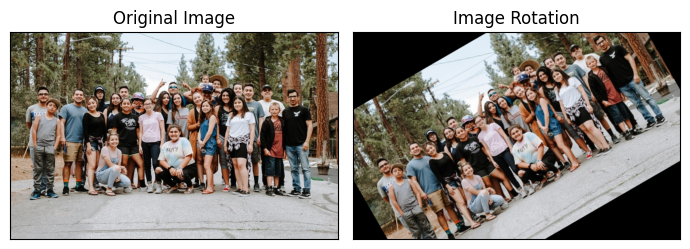

In [11]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread(r"C:\Users\chatt\Desktop\Computer Vision Tutorials\OpenCV Tutorials\Resources\Photos\group 1.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
center = (image_rgb.shape[1] // 2, image_rgb.shape[0] // 2)
angle = 30
scale = 1
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_image = cv2.warpAffine(image_rgb, rotation_matrix, (img.shape[1], img.shape[0]))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[1].imshow(rotated_image)
axs[1].set_title('Image Rotation')
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.tight_layout()
plt.show()

Image Translation

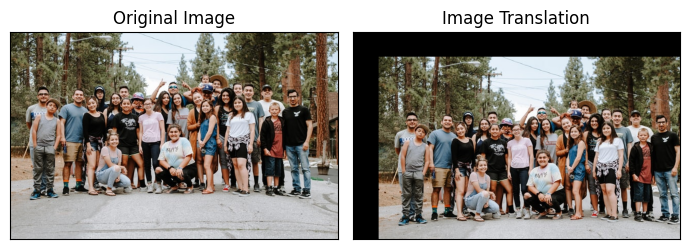

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread(r"C:\Users\chatt\Desktop\Computer Vision Tutorials\OpenCV Tutorials\Resources\Photos\group 1.jpg")
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
width, height = image_rgb.shape[1], image_rgb.shape[0]

tx, ty = 50, 50
translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
translated_image = cv2.warpAffine(image_rgb, translation_matrix, (width, height))

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(translated_image), axs[1].set_title('Image Translation')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

Image Normalization - Normalization in image is performed to improve the contrast of an image or to standardize the pixel values for further processing.

In OpenCV Python, the normalize() function from the cv2 module is used to normalize images. This function allows us to specify the desired range for the pixel intensity values.

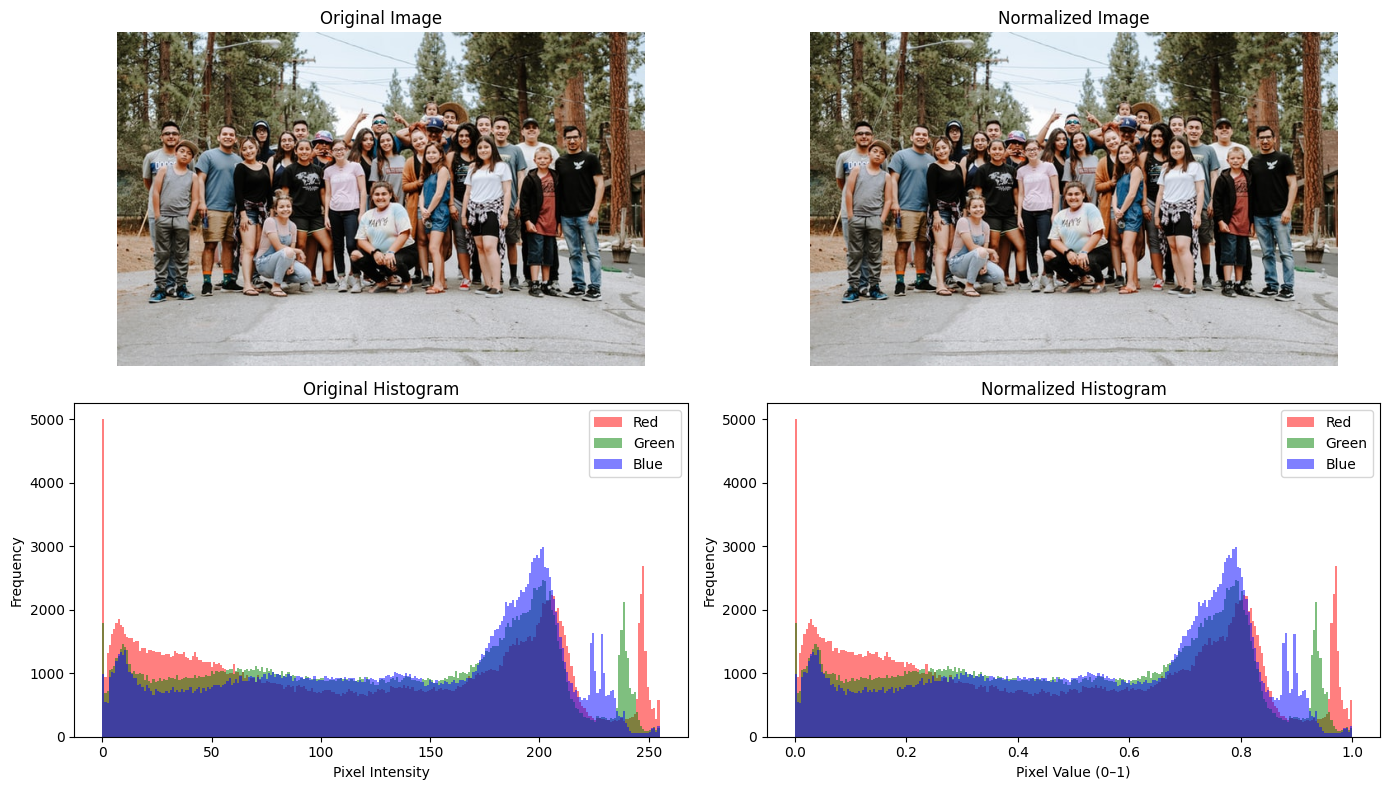

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load and convert image
image = cv2.imread(r"C:\Users\chatt\Desktop\Computer Vision Tutorials\OpenCV Tutorials\Resources\Photos\group 1.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split channels
b, g, r = cv2.split(image_rgb)

# Normalize each channel (float32, range 0–1)
b_norm = cv2.normalize(b.astype('float32'), None, 0, 1, cv2.NORM_MINMAX)
g_norm = cv2.normalize(g.astype('float32'), None, 0, 1, cv2.NORM_MINMAX)
r_norm = cv2.normalize(r.astype('float32'), None, 0, 1, cv2.NORM_MINMAX)

normalized_image = cv2.merge((b_norm, g_norm, r_norm))

# 📊 Plot original and normalized images side-by-side
plt.figure(figsize=(14, 8))

# Show original image
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

# Show normalized image
plt.subplot(2, 2, 2)
plt.imshow(normalized_image)
plt.title("Normalized Image")
plt.axis('off')

# 📈 Histogram of original image
plt.subplot(2, 2, 3)
plt.hist(r.ravel(), bins=256, color='red', alpha=0.5, label='Red')
plt.hist(g.ravel(), bins=256, color='green', alpha=0.5, label='Green')
plt.hist(b.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
plt.title("Original Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.legend()

# 📈 Histogram of normalized image
plt.subplot(2, 2, 4)
plt.hist(r_norm.ravel(), bins=256, color='red', alpha=0.5, label='Red')
plt.hist(g_norm.ravel(), bins=256, color='green', alpha=0.5, label='Green')
plt.hist(b_norm.ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
plt.title("Normalized Histogram")
plt.xlabel("Pixel Value (0–1)")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()


# Very Important method of Image Processing 

Edge Detection of Image 

Edge detection is used to find sharp edges withing image to find different objects and boundaries within a image. Canny Edge Detection is a popular edge detection method. Here:

cv2.GaussianBlur(): Removes noise through Gaussian smoothing.
cv2.Sobel(): Computes the gradient of the image.
cv2.Canny(): Applies non-maximum suppression and hysteresis thresholding to detect edges.

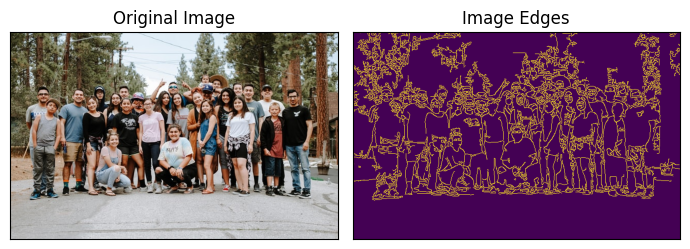

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\chatt\Desktop\Computer Vision Tutorials\OpenCV Tutorials\Resources\Photos\group 1.jpg")

image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
edges = cv2.Canny(image_rgb, 100, 700)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
axs[0].imshow(image_rgb), axs[0].set_title('Original Image')
axs[1].imshow(edges), axs[1].set_title('Image Edges')

for ax in axs:
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()

 
# Morphological Image Processing

Morphological Image Processing involves techniques that process the structure or shape of objects in an image. It focuses on operations like dilation, erosion, opening and closing which modify the image's geometric features

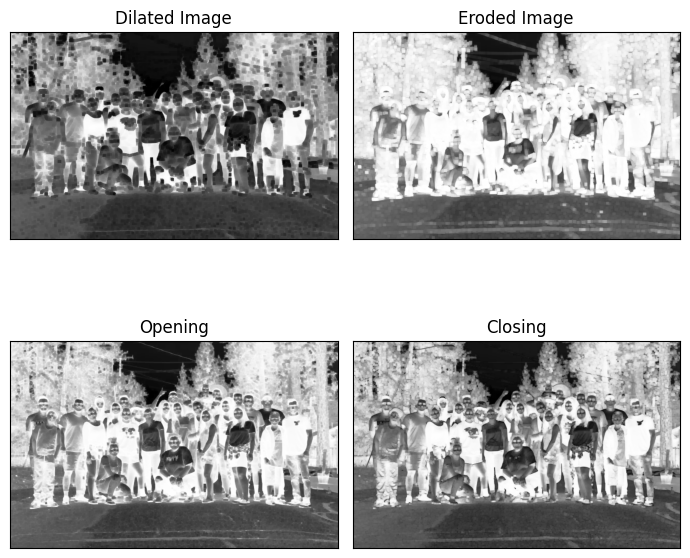

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\chatt\Desktop\Computer Vision Tutorials\OpenCV Tutorials\Resources\Photos\group 1.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3, 3), np.uint8)

dilated = cv2.dilate(image_gray, kernel, iterations=2)
eroded = cv2.erode(image_gray, kernel, iterations=2)
opening = cv2.morphologyEx(image_gray, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(image_gray, cv2.MORPH_CLOSE, kernel)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
axs[0, 0].imshow(dilated, cmap='Greys'), axs[0, 0].set_title('Dilated Image')
axs[0, 1].imshow(eroded, cmap='Greys'), axs[0, 1].set_title('Eroded Image')
axs[1, 0].imshow(opening, cmap='Greys'), axs[1, 0].set_title('Opening')
axs[1, 1].imshow(closing, cmap='Greys'), axs[1, 1].set_title('Closing')

for ax in axs.flatten():
    ax.set_xticks([]), ax.set_yticks([])

plt.tight_layout()
plt.show()